# Scrapping With BeautifulSoup for Chocolate Review Analysis

In this project we gonna scrap a Codecademy website that contains information about chocolate, then analyze the data to answer the following questions:

- Where are the best cocao beans grown?
- Which countries produce the highest-rated bars?
- What’s the relationship between cocao solids percentage and rating?

As we are scrapping the data from a website, it is not ready for analysis until we clean and tidy it.

## Structure of the data

The data is laid out on a table and each column is labelled with the column name as the class. It has the following format:

| Company  (Maker-if known) | Specific Bean Origin or Bar Name | REF | Review Date |Cocoa Percent | Company Location | Rating | Bean Type |	Broad Bean Origin |
| --- | --- | --- | --- | --- | --- | --- | --- | --- |
| A. Morin | Sur del Lago | 1315 | 2014 | 70% |	France | 3.5 | Criollo | Venezuela |
| Adi | Vanua Levu | 705 | 2011 | 60% | Fiji | 2.75 | Trinitario | Fiji |


The column *Cocoa Percent* has a typo and should be *Cacao Percent*. We will change that later

## Libraries

For the project we need different python library. *request* to make request to the website, *bs4* to extract the data from the response we get of the website, *pandas* for data cleaning, *matplotlib* for visualizaling the data.

In [139]:
# Importing necessary libraries

import requests
from bs4 import BeautifulSoup
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [23]:
# Requesting the data 

URL = "https://content.codecademy.com/courses/beautifulsoup/cacao/index.html"
COLUMNS = ["Company", "Origin", "REF", "ReviewDate", "CocoaPercent", "CompanyLocation",
"Rating", "BeanType", "BroadBeanOrigin"]

response = requests.get(URL)
soup = BeautifulSoup(response.content, "html.parser")

In [80]:
# Extracting data and create DataFrame

data_dict = {}

for colname in COLUMNS:
    data_dict[colname] = [element.get_text() for element in soup.find_all(attrs={"class": colname})][1:]

choco_df = pd.DataFrame(data_dict)

choco_df.head(10)

,Company,Origin,REF,ReviewDate,CocoaPercent,CompanyLocation,Rating,BeanType,BroadBeanOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.5,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.5,,Peru
5,A. Morin,Carenero,1315,2014,70%,France,2.75,Criollo,Venezuela
6,A. Morin,Cuba,1315,2014,70%,France,3.5,,Cuba
7,A. Morin,Sur del Lago,1315,2014,70%,France,3.5,Criollo,Venezuela
8,A. Morin,Puerto Cabello,1319,2014,70%,France,3.75,Criollo,Venezuela
9,A. Morin,Pablino,1319,2014,70%,France,4,,Peru


## Data Cleaning

Now that we have the data into a data frame, we will clean it and make it ready for analysis.

The first step would be to identify qualitative and quantitative columns, then make the necessary data conversion. As the data came from scrapping a website, the columns value are string object. Luckily we can access the string properties to clean the data. 

In [76]:
# Data Types
choco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Company          1795 non-null   object
 1   Origin           1795 non-null   object
 2   REF              1795 non-null   object
 3   ReviewDate       1795 non-null   object
 4   CocoaPercent     1795 non-null   object
 5   CompanyLocation  1795 non-null   object
 6   Rating           1795 non-null   object
 7   BeanType         1795 non-null   object
 8   BroadBeanOrigin  1795 non-null   object
dtypes: object(9)
memory usage: 126.3+ KB


In [81]:
# Trimming white space

for colname in COLUMNS:
    choco_df[colname] = choco_df[colname].str.strip()

# Renaming Column CocoaPercent to CacaoPercent
choco_df.rename(columns={"CocoaPercent": "CacaoPercent"}, inplace=True)

# REF, ReviewDate, CocoaPercent, and Rating columns should be numerical

choco_df['REF'] = choco_df['REF'].astype(int)
choco_df['ReviewDate'] = choco_df['ReviewDate'].astype(int)
choco_df['CacaoPercent'] = pd.to_numeric(choco_df['CacaoPercent'].str.rstrip("%"))
choco_df['Rating'] = choco_df['Rating'].astype(float)

choco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Company          1795 non-null   object 
 1   Origin           1795 non-null   object 
 2   REF              1795 non-null   int64  
 3   ReviewDate       1795 non-null   int64  
 4   CacaoPercent     1795 non-null   float64
 5   CompanyLocation  1795 non-null   object 
 6   Rating           1795 non-null   float64
 7   BeanType         1795 non-null   object 
 8   BroadBeanOrigin  1795 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 126.3+ KB


In [82]:
# Some Bean Type are missing, So we replace them with Unknown

choco_df['BeanType'] = choco_df['BeanType'].replace("", "Unknown")
choco_df.head(10)

,Company,Origin,REF,ReviewDate,CacaoPercent,CompanyLocation,Rating,BeanType,BroadBeanOrigin
0,A. Morin,Agua Grande,1876,2016,63.0,France,3.75,Unknown,Sao Tome
1,A. Morin,Kpime,1676,2015,70.0,France,2.75,Unknown,Togo
2,A. Morin,Atsane,1676,2015,70.0,France,3.00,Unknown,Togo
3,A. Morin,Akata,1680,2015,70.0,France,3.50,Unknown,Togo
4,A. Morin,Quilla,1704,2015,70.0,France,3.50,Unknown,Peru
5,A. Morin,Carenero,1315,2014,70.0,France,2.75,Criollo,Venezuela
6,A. Morin,Cuba,1315,2014,70.0,France,3.50,Unknown,Cuba
7,A. Morin,Sur del Lago,1315,2014,70.0,France,3.50,Criollo,Venezuela
8,A. Morin,Puerto Cabello,1319,2014,70.0,France,3.75,Criollo,Venezuela
9,A. Morin,Pablino,1319,2014,70.0,France,4.00,Unknown,Peru


## Data Analysis

In [83]:
# Quick Summary Statistics of the Data
choco_df.describe(include="all")

,Company,Origin,REF,ReviewDate,CacaoPercent,CompanyLocation,Rating,BeanType,BroadBeanOrigin
count,1795,1795,1795.000000,1795.000000,1795.000000,1795,1795.000000,1795,1795
unique,416,1039,NaN,NaN,NaN,60,NaN,41,100
top,Soma,Madagascar,NaN,NaN,NaN,U.S.A.,NaN,Unknown,Venezuela
freq,47,57,NaN,NaN,NaN,764,NaN,888,214
mean,NaN,NaN,1035.904735,2012.325348,71.698329,NaN,3.185933,NaN,NaN
std,NaN,NaN,552.886365,2.927210,6.323118,NaN,0.478062,NaN,NaN
min,NaN,NaN,5.000000,2006.000000,42.000000,NaN,1.000000,NaN,NaN
25%,NaN,NaN,576.000000,2010.000000,70.000000,NaN,2.875000,NaN,NaN
50%,NaN,NaN,1069.000000,2013.000000,70.000000,NaN,3.250000,NaN,NaN
75%,NaN,NaN,1502.000000,2015.000000,75.000000,NaN,3.500000,NaN,NaN


## Summary Statistics Overview

- There are 1795 entries in the dataframe.
- Among those 1795 there are only 416 different companies, spread over 60 countries.
- Soma has the most entries, probably the company with more cacao bean production.
- Most companies are located in the USA.
- Most cacao beans are from Venezuela.
- There are 888 cocoa bean we don't have information about their type.
- The chocolate with least and most amount of cacao has 42% oand 100% respectively.
- 50% of the chocolate has has less than 70% of cacao, while 75% has less than 75% of cacao.
- 75% of chocolate has a rating less than 3.5

## Distribution of Ratings and Cocoa Percentage

To get a clear view of how those variables are spread out among the different chocolates, we will plot them on a histogram.

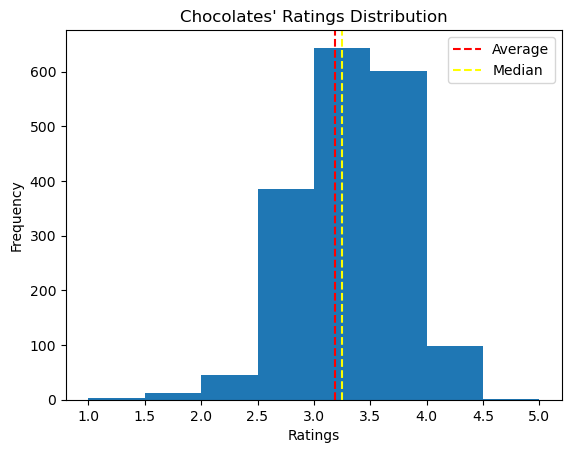

In [64]:
plt.hist(x=choco_df['Rating'], bins=8)
plt.title("Chocolates' Ratings Distribution")
plt.xlabel("Ratings")
plt.ylabel("Frequency")
plt.axvline(choco_df['Rating'].mean(), color="red", linestyle="--", label="Average")
plt.axvline(choco_df['Rating'].median(), color="yellow", linestyle="--", label="Median")
plt.legend()

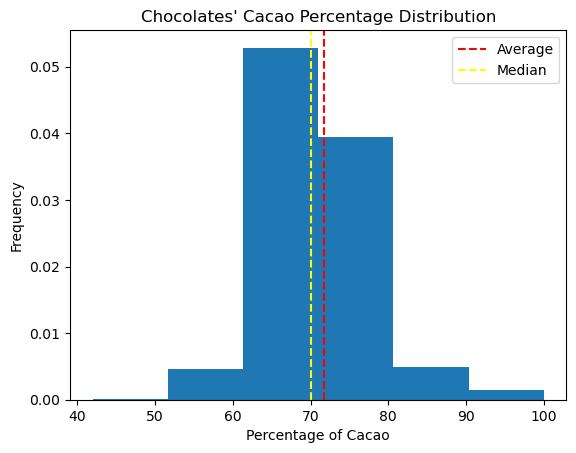

In [84]:
plt.hist(x=choco_df['CacaoPercent'], bins=6, density=True)
plt.title("Chocolates' Cacao Percentage Distribution")
plt.xlabel("Percentage of Cacao")
plt.ylabel("Frequency")
plt.axvline(choco_df['CacaoPercent'].mean(), color="red", linestyle="--", label="Average")
plt.axvline(choco_df['CacaoPercent'].median(), color="yellow", linestyle="--", label="Median")
plt.legend()

## Where are the best cacao beans grown?

We consider that a good cocoa bean is one with a high rating from 3.5 to 5. Now to know where the best cacao beans are grown, we need to group the dataframe by the column BroadBeanOrigin, while getting the average of the ratings column. Then, order the data in descending order by ratings, so printing the head would give us the top.


In [110]:
# Grouping by country of origin 
groupby_origin_mean_rating = choco_df.groupby(by=["BroadBeanOrigin"])["Rating"].mean().reset_index()

# Ordering by average ratings
groupby_origin_mean_rating.sort_values(by=["Rating"], ascending=False, inplace=True)
groupby_origin_mean_rating.index = pd.RangeIndex(len(groupby_origin_mean_rating))

# Top 10 countries where the best cacao beans grow 
groupby_origin_mean_rating.head(10)

# A shorter version of the above

# groupby_origin_mean_rating = choco_df.groupby(by=["BroadBeanOrigin"])["Rating"].mean()
# groupby_origin_mean_rating.nlargest(10).reset_index()

,BroadBeanOrigin,Rating
0,"Gre., PNG, Haw., Haiti, Mad",4.00
1,"Venezuela, Java",4.00
2,"Guat., D.R., Peru, Mad., PNG",4.00
3,"Ven, Bolivia, D.R.",4.00
4,"Dom. Rep., Madagascar",4.00
5,"Peru, Dom. Rep",4.00
6,"Dominican Rep., Bali",3.75
7,"DR, Ecuador, Peru",3.75
8,"Venez,Africa,Brasil,Peru,Mex",3.75
9,"Ven.,Ecu.,Peru,Nic.",3.75


##  Which countries produce the highest-rated bars?

The cacao beans may be grown in a country, but it doesn't necessarily mean that the chocolate are produced in the same country. Now we will filter the dataframe for the ratings above 4.5, to see how many are there and from what company. Then to get the countries that produce the highest-rated bars, we will group the dataframe by company location and average the rating. 

In [111]:
# Highest Rating; above 4.5
choco_df.loc[choco_df['Rating'] > 4.5]

,Company,Origin,REF,ReviewDate,CacaoPercent,CompanyLocation,Rating,BeanType,BroadBeanOrigin
78,Amedei,Chuao,111,2007,70.0,Italy,5.0,Trinitario,Venezuela
86,Amedei,Toscano Black,40,2006,70.0,Italy,5.0,Blend,


In [116]:
# Groupping by company location
grouby_location_mean_rating = choco_df.groupby(by=["CompanyLocation"])["Rating"].mean()

# Top 10 countries
top_ten_location = grouby_location_mean_rating.nlargest(10).reset_index()
top_ten_location

,CompanyLocation,Rating
0,Chile,3.750000
1,Amsterdam,3.500000
2,Netherlands,3.500000
3,Philippines,3.500000
4,Iceland,3.416667
5,Vietnam,3.409091
6,Brazil,3.397059
7,Poland,3.375000
8,Australia,3.357143
9,Guatemala,3.350000


Although Italy registred two highest ratings, it also registred some low ratings because its rating average is not in the top ten.

## What’s the relationship between cocao solids percentage and rating?

Every chocolate is made with a percentage of cacao. So we will check if there is any relation between the amount of cacao in a chocolate and the ratings the chocolate receives.

Text(0.5, 1.0, 'Does more Cacao mean better Chocolate?')

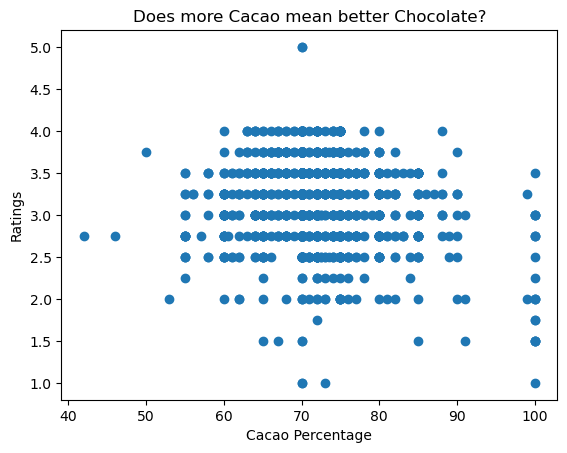

In [145]:
plt.scatter(choco_df['CacaoPercent'], choco_df['Rating'])
plt.xlabel("Cacao Percentage")
plt.ylabel("Ratings")
plt.title("Does more Cacao mean better Chocolate?")

The plot does not show any particular relation between them.